In [154]:
pip install folium

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: folium in c:\users\maria\appdata\local\programs\python\python310\lib\site-packages (0.17.0)



You should consider upgrading via the 'c:\Users\maria\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [155]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\maria\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [156]:

from delimitation import Delimitation
from fileHandler import FileHandler
from point import Point
from valid_points import ValidPoints

In [157]:
#test_delimitation_initialization:
delim = Delimitation()

# Test that it's an instance of Delimitation
print( isinstance(delim, Delimitation))

# Test that no points are present initially
print( delim.get_points() == [])

# Test that the size is 0
print( delim.size() == 0)

True
True
True


In [158]:
#test_add_single_point():
delim = Delimitation()
p1 = Point("p1", 10, 20)

delim.add_point(p1)

# Test that the point is added correctly
points = delim.get_points()
print(points == [p1])

# Test that the size is updated
print(delim.size() == 1)

True
True


In [159]:
# Cell 4: Test Adding Multiple Points
delim = Delimitation()
p1 = Point("p1", 10, 20)
p2 = Point("p2", 15, 25)

delim.add_point(p1)
delim.add_point(p2)

# Test that the points are added in the correct order
points = delim.get_points()
print(points == [p1, p2])

# Test that the size reflects the correct number of points
print(delim.size() == 2)

True
True


In [160]:
# Cell 5: Test Adding Duplicate Points
delim = Delimitation()
p1 = Point("p1", 10, 20)

delim.add_point(p1)
delim.add_point(p1)

# Test that the duplicate point is added (if allowed)
points = delim.get_points()
print(points == [p1, p1])

# Test that the size counts duplicates
print(delim.size() == 2)


True
True


In [161]:
# Cell 6: Test Popping a Single Point
delim = Delimitation()
p1 = Point("p1", 10, 20)

delim.add_point(p1)
popped = delim.pop_point()

# Test that the correct point is popped
print(popped == p1)

# Test that the list is now empty
print(delim.get_points() == [])

# Test that the size is updated
print(delim.size() == 0)


True
True
True


In [162]:
# Cell 7: Test Popping Multiple Points
delim = Delimitation()
p1 = Point("p1", 10, 20)
p2 = Point("p2", 15, 25)

delim.add_point(p1)
delim.add_point(p2)

# Pop the last added point
popped = delim.pop_point()
print(popped == p2)
print(delim.get_points() == [p1])

# Pop the first point
popped = delim.pop_point()
print(popped == p1)
print(delim.get_points() == [])
print(delim.size() == 0)


True
True
True
True
True


In [163]:
# Cell 8: Test Popping from an Empty Delimitation
delim = Delimitation()

try:
    delim.pop_point()
    print("Expected an exception when popping from an empty Delimitation")
except IndexError:
    print("Caught expected IndexError when popping from an empty Delimitation")


Caught expected IndexError when popping from an empty Delimitation


In [164]:
# Cell 9: Test Getting Points from an Empty Delimitation
delim = Delimitation()

# Test that an empty list is returned
print(delim.get_points() == [])


True


In [165]:
# Cell 10: Test Getting Points in Order
delim = Delimitation()
p1 = Point("p1", 10, 20)
p2 = Point("p2", 15, 25)

delim.add_point(p1)
delim.add_point(p2)

# Test that points are returned in the correct order
points = delim.get_points()
print(points == [p1, p2])


True


In [166]:
# Cell 11: Test Getting Points Immutable
delim = Delimitation()
p1 = Point("p1", 10, 20)
delim.add_point(p1)

points = delim.get_points()

# Modify the returned list and check the internal state
delim.add_point(Point("p2", 15, 25))
print(delim.get_points() == [p1, Point("p2", 15, 25)])  # Should be true


True


In [167]:
# Cell 12: Test Getting First Point
delim = Delimitation()
p1 = Point("p1", 10, 20)
delim.add_point(p1)

# Test that it returns the first point
print(delim.get_first() == p1)


True


In [168]:
# Cell 13: Test Getting First Point with Multiple Points
delim = Delimitation()
p1 = Point("p1", 10, 20)
p2 = Point("p2", 15, 25)

delim.add_point(p1)
delim.add_point(p2)

# Test that it returns the first point
print(delim.get_first() == p1)


True


In [169]:
# Cell 14: Test Getting First Point when No Points Exist
delim = Delimitation()

print(delim.get_first()==None)


True


In [170]:
# Cell 15: Test Getting Last Two Points with Exactly Two Points
delim = Delimitation()
p1 = Point("p1", 10, 20)
p2 = Point("p2", 15, 25)

delim.add_point(p1)
delim.add_point(p2)

# Test that it returns the last two points in the correct order
print(delim.get_last_two() == (p1, p2))


True


In [171]:
# Cell 16: Test Getting Last Two Points with More Than Two Points
delim = Delimitation()
p1 = Point("p1", 10, 20)
p2 = Point("p2", 15, 25)
p3 = Point("p3", 30, 35)

delim.add_point(p1)
delim.add_point(p2)
delim.add_point(p3)

# Test that it returns the last two points, p2 and p3
print(delim.get_last_two() == (p2, p3))


True


In [172]:
# Cell 17: Test Getting Last Two Points with Less Than Two Points
delim = Delimitation()
p1 = Point("p1", 10, 20)

delim.add_point(p1)

print(delim.get_last_two()==(None, p1))


True


In [173]:
# Cell 18: Test Area Calculation with Less Than Three Points
delim = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 10)

delim.add_point(p1)
delim.add_point(p2)

# Test that ValueError is raised with less than 3 points
try:
    delim.get_area()
    print("Expected ValueError when calculating area with less than 3 points")
except ValueError as e:
    print(f"Caught expected ValueError: {e}")


Caught expected ValueError: A polygon must have at least 3 points to calculate the area.


In [174]:
# Cell 19: Test Area Calculation with Collinear Points
delim = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 10)
p3 = Point("p3", 20, 20)  # Collinear with p1 and p2

delim.add_point(p1)
delim.add_point(p2)
delim.add_point(p3)

# Test that ValueError is raised for collinear points
try:
    delim.get_area()
    print("Expected ValueError when calculating area with collinear points")
except ValueError as e:
    print(f"Caught expected ValueError: {e}")


Caught expected ValueError: It is impossible to form a polygon with collinear points.


In [175]:
# Cell 20: Test Copy Independence
delim = Delimitation()
p1 = Point("p1", 10, 20)
p2 = Point("p2", 15, 25)

delim.add_point(p1)
delim.add_point(p2)

# Create a copy
delim_copy = delim.copy()

# Test that the copied points are identical but independent
print(delim.get_points() == delim_copy.get_points())

# Modify the copy and check that the original is not affected
p3 = Point("p3", 30, 35)
delim_copy.add_point(p3)

print(delim.get_points() != delim_copy.get_points())
print(delim.size() == 2)
print(delim_copy.size() == 3)


True
True
True
True


In [176]:
# Cell 21: Test Intersecting Segments
delim = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 10)
p3 = Point("p3", 0, 10)
p4 = Point("p4", 10, 0)

# These two segments intersect at (5, 5)
print(delim.intersects(p1, p2, p3, p4))


True


In [177]:
# Cell 22: Test Non-Intersecting Segments
delim = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 10)
p3 = Point("p3", 20, 20)
p4 = Point("p4", 30, 30)

# These segments do not intersect
print(not delim.intersects(p1, p2, p3, p4))


True


In [178]:
# Cell 23: Test Parallel Segments
delim = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 0)
p3 = Point("p3", 0, 10)
p4 = Point("p4", 10, 10)

# Parallel lines should not intersect
print(not delim.intersects(p1, p2, p3, p4))


True


In [179]:
# Cell 24: Test Overlapping Segments
delim = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 10)
p3 = Point("p3", 5, 5)
p4 = Point("p4", 15, 15)

# Overlapping segments should not be considered intersecting
print(not delim.intersects(p1, p2, p3, p4))


True


In [180]:
# Cell 25: Test Crossing Delimitation with Crossing Segment
delim = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 0)
p3 = Point("p3", 9, 10)
p4 = Point("p4", 5, 5)

delim.add_point(p1)
delim.add_point(p2)

# This new segment crosses the existing line (p1 -> p2)
print(not delim.crosses_delimitation(p4, p3))


True


In [181]:
# Cell 26: Test Crossing Delimitation with No Crossing
delim = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 0)
p3 = Point("p3", 10, 10)

delim.add_point(p1)
delim.add_point(p2)

print(not delim.crosses_delimitation(p2, p3))


True


In [182]:
# Cell 27: Test Crossing Delimitation Touching Corner
delim = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 0)
p3 = Point("p3", 0, 10)

delim.add_point(p1)
delim.add_point(p2)

# This new segment touches p1 but does not cross
print(not delim.crosses_delimitation(p3, p1))


True


In [183]:
# Cell 28: Test Size of Empty Delimitation
delim = Delimitation()
# Initially, the size should be 0
print(delim.size() == 0)


True


In [184]:
# Cell 29: Test Size After Adding Points
delim = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 10)

delim.add_point(p1)
delim.add_point(p2)

# After adding two points, the size should be 2
print(delim.size() == 2)


True


In [185]:
# Cell 30: Test Size After Removing Points
delim = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 10)

delim.add_point(p1)
delim.add_point(p2)
delim.pop_point()  # Remove one point

# After removing one point, the size should be 1
print(delim.size() == 1)


True


In [186]:
# Cell 31: Test Getting First Point with One Point
delim = Delimitation()
p1 = Point("p1", 0, 0)
delim.add_point(p1)

# First point should be p1
print(delim.get_first() == p1)


True


In [187]:
# Cell 32: Test Getting First Point with Multiple Points
delim = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 10)

delim.add_point(p1)
delim.add_point(p2)

# First point should still be p1
print(delim.get_first() == p1)


True


In [188]:
# Cell 33: Test Get First with No Points
delim = Delimitation()

try:
    assert delim.get_first() is None, "Expected None when calling get_first on an empty Delimitation"
except IndexError:
    pass  # Assuming IndexError or a custom exception is raised


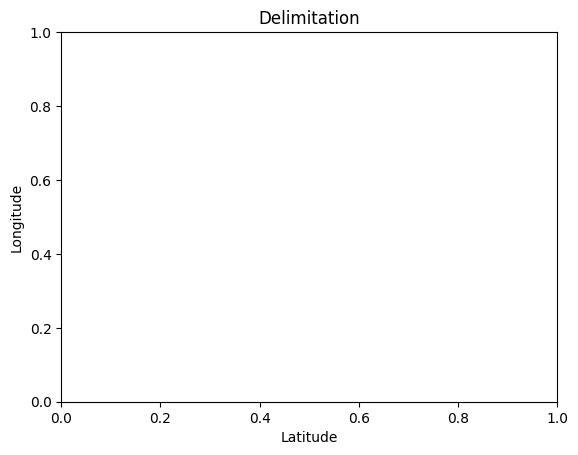

In [189]:
# Cell 34: Test Show with No Points
from unittest.mock import patch

delim = Delimitation()

with patch('matplotlib.pyplot.show') as mock_show:
    delim.show(ValidPoints([]))
    # Ensure the plotting method was called even with no points
    mock_show.assert_called()


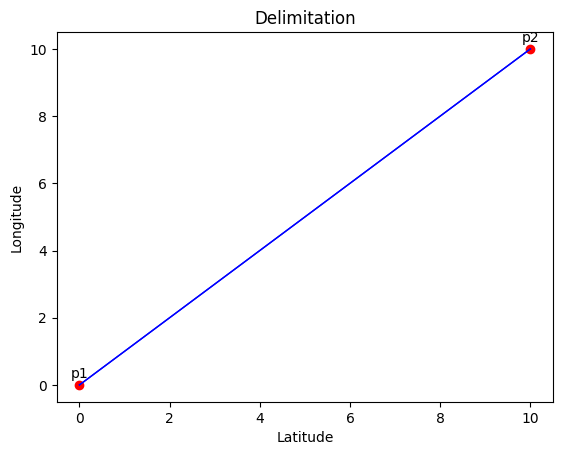

In [190]:
# Cell 35: Test Show with Points
delim = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 10)

delim.add_point(p1)
delim.add_point(p2)

valid_points = ValidPoints([p1, p2])

with patch('matplotlib.pyplot.show') as mock_show:
    delim.show(valid_points)
    # Ensure the plotting method was called
    mock_show.assert_called()


In [191]:
# Cell 36: Test Equality with Same Order
delim1 = Delimitation()
delim2 = Delimitation()

p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 10)

delim1.add_point(p1)
delim1.add_point(p2)

delim2.add_point(p1)
delim2.add_point(p2)

# Both delimitations have the same points in the same order
print(delim1 == delim2)


True


In [192]:
# Cell 37: Test Equality with Different Points
delim1 = Delimitation()
delim2 = Delimitation()

p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 10)
p3 = Point("p3", 5, 5)

delim1.add_point(p1)
delim1.add_point(p2)

delim2.add_point(p1)
delim2.add_point(p3)

# Different points in delimitations should make them unequal
print(delim1 != delim2)


True


In [193]:
# Cell 38: Test Equality with Different Order
delim1 = Delimitation()
delim2 = Delimitation()

p1 = Point("p1", 0, 0)
p2 = Point("p2", 10, 10)
p3 = Point("p3", 5, 5)

# Delimitation 1: add points in order p1, p2, p3
delim1.add_point(p1)
delim1.add_point(p2)
delim1.add_point(p3)

# Delimitation 2: add points in a different order but forming the same polygon
delim2.add_point(p3)
delim2.add_point(p2)
delim2.add_point(p1)

# Test that different order does not affect equality
print(delim1 == delim2)


True


In [194]:
# Cell 39: Test Equal Triangles
delim1 = Delimitation()
delim2 = Delimitation()

# Triangle A
points1 = [Point("p1", 0, 0), Point("p2", 0, 10), Point("p3", 10, 0)]
# Triangle A but in different order
points2 = [Point("p3", 10, 0), Point("p1", 0, 0), Point("p2", 0, 10)]

for point in points1:
    delim1.add_point(point)
for point in points2:
    delim2.add_point(point)

print(delim1 == delim2)  # Should be True


True


In [215]:
# Cell 40: Test Intersect
p_A = Point("A", -1, 10)
p_B = Point("B", 10, 10)
p_C = Point("C", 5, 5)
p_D = Point("D", 0, 0)

p_1 = Point("A", 0, -1)
p_2 = Point("B", 0, -2)
# add pD
p_3 = Point("C", 7, 11)
p_4 = Point("D", 5, 15)
p_5 = Point("D", 4, 14)

d = Delimitation()
d.add_point(p_1)
d.add_point(p_2)
d.add_point(p_D)
d.add_point(p_3)
d.add_point(p_4)
d.add_point(p_5)

print(d.crosses_delimitation(p_A, p_B))# Should print True
print(d.crosses_delimitation(p_A, p_D))# Should print True
print(d.crosses_delimitation(p_B, p_C))# Should print False
print(d.crosses_delimitation(p_A, d.get_first()))# Should print False
print(d.crosses_delimitation(p_1, d.get_last_two()[1]))# Should print True


True
True
False
False
True


In [196]:
# Cell 41: Test Equal Polygons with Rotations
delim1 = Delimitation()
delim2 = Delimitation()

# Create a square
points1 = [Point("p1", 0, 0), Point("p2", 0, 10), Point("p3", 10, 10), Point("p4", 10, 0)]
# Rotated version of the same square
points2 = [Point("p2", 0, 10), Point("p3", 10, 10), Point("p4", 10, 0), Point("p1", 0, 0)]

for point in points1:
    delim1.add_point(point)
for point in points2:
    delim2.add_point(point)

print(delim1 == delim2)  # Should be True


True


In [197]:
# Cell 42: Test Not Equal Polygons
delim1 = Delimitation()
delim2 = Delimitation()

# Triangle A
points1 = [Point("p1", 0, 0), Point("p2", 0, 10), Point("p3", 10, 0)]
# A different triangle
points2 = [Point("p1", 0, 0), Point("p2", 5, 5), Point("p3", 10, 0)]

for point in points1:
    delim1.add_point(point)
for point in points2:
    delim2.add_point(point)

print(delim1 != delim2)


True


In [198]:
# Cell 43: Test Add Valid Point
delim = Delimitation()
point = Point("p1", 0, 0)

# Add a valid point
delim.add_point(point)

# Check if the point was added
print(len(delim.get_points()) == 1)
print(delim.get_points()[0] == point)


True
True


In [199]:
# Cell 44: Test Add Multiple Points
delim = Delimitation()
points = [Point("p1", 0, 0), Point("p2", 0, 10), Point("p3", 10, 0)]

# Add multiple valid points
for point in points:
    delim.add_point(point)

# Check if all points were added
print(len(delim.get_points()) == 3)
for i, point in enumerate(points):
    print(delim.get_points()[i] == point)


True
True
True
True


In [200]:
# Cell 45: Test Add Invalid Point Type
delim = Delimitation()

try:
    delim.add_point("Not a Point")  # Trying to add a string
except ValueError as e:
    print("Caught expected ValueError:", e)


Caught expected ValueError: Only Point objects can be added to the Delimitation object


In [201]:
# Cell 46: Test Add Integer Instead of Point
delim = Delimitation()

try:
    delim.add_point(123)  # Trying to add an integer
except ValueError as e:
    print("Caught expected ValueError:", e)


Caught expected ValueError: Only Point objects can be added to the Delimitation object


In [202]:
# Cell 47: Test Add None as Point
delim = Delimitation()

try:
    delim.add_point(None)  # Trying to add None
except ValueError as e:
    print("Caught expected ValueError:", e)


Caught expected ValueError: Only Point objects can be added to the Delimitation object


In [203]:
# Test: Equality of Delimitations
delim1 = Delimitation()
delim2 = Delimitation()
delim3 = Delimitation()
delim4 = Delimitation()

p1 = Point("p1", 0.0, 10.0)
p2 = Point("p2", 10.0, 10.0)
p4 = Point("p4", 4.0, 5.0)
p6 = Point("p6", 1.0, 20.0)
p8 = Point("p8", 12.0, -1.0)

# Create the first delimitation (d1)
delim1.add_point(p1)
delim1.add_point(p4)
delim1.add_point(p8)
delim1.add_point(p2)
delim1.add_point(p6)

# Create the second delimitation (d2)
delim2.add_point(p8)
delim2.add_point(p2)
delim2.add_point(p6)
delim2.add_point(p1)
delim2.add_point(p4)

# Create the third delimitation (d3)
delim3.add_point(p4)
delim3.add_point(p1)
delim3.add_point(p6)
delim3.add_point(p2)
delim3.add_point(p8)

# Create the fourth delimitation (d4)
delim4.add_point(p4)
delim4.add_point(p1)
delim4.add_point(p6)
delim4.add_point(p2)

# Verify the points in each delimitation
print(delim1 == delim2)  # Should print True
print(delim1 == delim3)  # Should print True
print(delim1 == delim4)  # Should print False


True
True
False


In [204]:
# Test: Empty Delimitation (test_get_points_empty_2)
d1 = Delimitation()
print(d1.get_points() == [])


True


In [205]:
# Test: Add and Get First Point (test_add_and_get_first_point_2)
d1 = Delimitation()
p1 = Point("p01", 10, 0)
p2 = Point("p02", 10, 10)

d1.add_point(p1)
d1.add_point(p2)

# Check the first point
print(d1.get_first() == p1)


True


In [206]:
# Test: Get Last Two Points (test_get_last_two_points_2)
d1 = Delimitation()
p1 = Point("p01", 10, 0)
p2 = Point("p02", 10, 10)

d1.add_point(p1)
d1.add_point(p2)

# Check the last two points
print(d1.get_last_two() == (p1, p2))


True


In [207]:
d1 = Delimitation()
p1 = Point("p01", 10, 0)
p2 = Point("p02", 10, 10)

d1.add_point(p1)
d1.add_point(p2)

# Pop last point
print(d1.pop_point() == p2)

# After popping, only the first point should remain
print(d1.get_points() == [p1])

True
True


In [208]:
#area_prof_2():

d2 = Delimitation()

# Create the points and add them to the delimitation
pA = Point("pA", -10, -10)
pB = Point("pB", 10, -10)
pC = Point("pC", 10, 10)
pE = Point("pE", 0, -9.9)
pD = Point("pD", -10, 10)

d2.add_point(pA)
d2.add_point(pB)
d2.add_point(pC)
d2.add_point(pE)
d2.add_point(pD)
print(d2.get_area()==708148.3951477829)

True


In [209]:
#area_prof_1():

delimitation = Delimitation()

# Create the points
p1 = Point("p1", 0.0, 10.0)
p4 = Point("p4", 4.0, 5.0)
p8 = Point("p8", 12.0, -1.0)
p2 = Point("p2", 10.0, 10.0)
p6 = Point("p6", 1.0, 20.0)

# Add points to the delimitation
delimitation.add_point(p1)
delimitation.add_point(p4)
delimitation.add_point(p8)
delimitation.add_point(p2)
delimitation.add_point(p6)

print(delimitation.get_area()==404310.0128400312)

True


In [210]:
# Test: Copy Delimitation (test_copy_delimitation)
d1 = Delimitation()
p1 = Point("p01", 10, 0)
p2 = Point("p02", 10, 10)

d1.add_point(p1)
d1.add_point(p2)

# Create a copy using the custom copy method
d1_1 = d1.copy()

# Check that the objects (Delimitation) are not the same
print(id(d1) != id(d1_1))  # True if they are not the same object
print(d1 == d1_1)  # True if they are equal in value

# Check that the points inside are equal but not the same objects
print(d1.get_first() == d1_1.get_first())  # True if the points are equal in value
print(id(d1.get_first()) != id(d1_1.get_first()))  # True if they are not the same object

# Check all points are new objects but equal in value
for p_orig, p_copy in zip(d1.get_points(), d1_1.get_points()):
    print(p_orig == p_copy)  # True if points are equal in value
    print(id(p_orig) != id(p_copy))  # True if they do not have the same ID


True
True
True
True
True
True
True
True


In [213]:
# Test: Intersect Test (test_intersect)
d = Delimitation()

print("Intersect Test Cases:\n")

# Test case 1: Intersecting lines
p1 = Point("p1", 1, 1)
p2 = Point("p2", 3, 3)
p3 = Point("p3", 1, 3)
p4 = Point("p4", 3, 1)
# Lines formed by p1-p2 and p3-p4 should intersect
print(d.intersects(p1, p2, p3, p4) == True)  # True if they intersect

# Test case 2: Parallel lines (no intersection)
p5 = Point("p5", 1, 1)
p6 = Point("p6", 3, 1)
p7 = Point("p7", 1, 2)
p8 = Point("p8", 3, 2)
# Lines formed by p5-p6 and p7-p8 are parallel and should not intersect
print(d.intersects(p5, p6, p7, p8) == False)  # False if no intersection

# Test case 3: Coincident lines (no intersection, or considered the same line)
p9 = Point("p9", 0, 0)
p10 = Point("p10", 2, 2)
p11 = Point("p11", 1, 1)
p12 = Point("p12", 3, 3)
# Lines formed by p9-p10 and p11-p12 are coincident (same line)
print(d.intersects(p9, p10, p11, p12) == False)  # False if coincident

# Test case 4: Intersecting lines with different slopes
p13 = Point("p13", 0, 0)
p14 = Point("p14", 4, 4)
p15 = Point("p15", 0, 4)
p16 = Point("p16", 4, 0)
# Lines formed by p13-p14 and p15-p16 should intersect
print(d.intersects(p13, p14, p15, p16) == True)  # True if they intersect

# Test case 5: Vertical and horizontal intersecting lines
p17 = Point("p17", 0, 0)
p18 = Point("p18", 0, 5)
p19 = Point("p19", -3, 2)
p20 = Point("p20", 3, 2)
# Lines formed by p17-p18 (vertical) and p19-p20 (horizontal) should intersect
print(d.intersects(p17, p18, p19, p20) == True)  # True if they intersect

print("All intersect tests passed!")


Intersect Test Cases:

True
True
True
True
True
All intersect tests passed!


In [212]:
# Test: Crosses Delimitation Test (test_crosses_delimitation)
print("\nCrosses Delimitation Test Cases:\n")

# Test case 1: Line intersects triangle
d = Delimitation()
p1 = Point("p1", 0, 0)
p2 = Point("p2", 4, 0)
p3 = Point("p3", 2, 4)
p4 = Point("p4", 0, 0)  # Closing the triangle

d.add_point(p1)
d.add_point(p2)
d.add_point(p3)
d.add_point(p4)

line_p1 = Point("p5", 2, 1)
line_p2 = Point("p6", 2, 5)

print(d.crosses_delimitation(line_p1, line_p2) == True)  # True if line intersects

# Test case 2: Line does not intersect square
g = Delimitation()
p5 = Point("p5", 0, 0)
p6 = Point("p6", 4, 0)
p7 = Point("p7", 4, 4)
p8 = Point("p8", 0, 4)

g.add_point(p5)
g.add_point(p6)
g.add_point(p7)
g.add_point(p8)

line_p1 = Point("p10", 5, 5)
line_p2 = Point("p11", 6, 6)

print(g.crosses_delimitation(line_p1, line_p2) == False)  # False if no intersection

# Test case 3: Line intersects the square
line_p1 = Point("p12", 2, -1)
line_p2 = Point("p13", 2, 5)

print(g.crosses_delimitation(line_p1, line_p2) == True)  # True if line intersects

# Test case 4: Line does not intersect
line_p1 = Point("p14", -1, -1)
line_p2 = Point("p15", 2, -2)

print(d.crosses_delimitation(line_p1, line_p2) == False)  # False if no intersection

print("All crosses delimitation tests passed!")



Crosses Delimitation Test Cases:

True
True
True
True
All crosses delimitation tests passed!
